In [167]:
import numpy as np
import math

n=7
position = np.array([[3,8],[7,9], [7,7], [10,9], [12,4], [7,1], [1,2]])
mutation_rate = 0.4


In [168]:
def dist(i,j):
    x1 = position[i][0]
    y1 = position[i][1]
    x2 = position[j][0]
    y2 = position[j][1]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)


In [169]:
dist(0,2)

4.123105625617661

In [170]:
a = np.array([5, 6, 4, 1, 3, 2, 0])
print(a)

[5 6 4 1 3 2 0]


In [171]:
sum = 0
for i in range(n-1):
    sum += dist(a[i],a[i+1])
sum+= dist(a[n-1], a[0])

print(sum)

43.12508487904284


In [172]:
k = np.arange(7)
np.random.shuffle(k)
print(k)

[4 0 6 2 1 3 5]


In [173]:
class DNA:
    def __init__(self):
        self.seq = np.arange(n)
        np.random.shuffle(self.seq)
        self.fitness = None
    
    def calc_fitness(self):
        self.fitness = 0
        for i in range(n-1):
            self.fitness += dist(self.seq[i],self.seq[i+1])
        self.fitness+= dist(self.seq[n-1], self.seq[0])

    def mutate(self):
        for i in range(n):
            if np.random.rand()<mutation_rate:
                # mutate
                id = np.random.randint(0,n)
                self.seq[i], self.seq[id] = self.seq[id], self.seq[i]

In [174]:
dna1 = DNA()
print(dna1.seq)
print(dna1.fitness)

[5 0 4 1 2 6 3]
None


In [175]:
dna1.calc_fitness()
print(dna1.fitness)

54.7381910341757


In [176]:
np.where(dna1.seq==2)[0]

array([4], dtype=int64)

In [177]:
# Crossover
def crossover(d1, d2):
    dna1 = d1
    dna2 = d2
    mid = np.random.randint(0, n)
    for i in range(mid):
        id = np.where(dna1.seq==dna2.seq[i])[0]
        dna1.seq[id], dna1.seq[i] = dna1.seq[i], dna1.seq[id]
        # id = np.where(dna2.seq==dna1.seq[i])[0]
        # dna2.seq[id], dna2.seq[i] = dna2.seq[i], dna2.seq[id]
    return dna1

In [178]:
a = DNA()
print(a.seq)
b = DNA()
print(b.seq)

[5 6 2 0 4 1 3]
[5 2 3 1 4 6 0]


In [179]:
c = crossover(a,b)
print(c.seq)


[5 2 6 0 4 1 3]


In [180]:
c.mutate()
print(c.seq)

[6 4 3 0 2 5 1]


In [181]:
# Initialization
pop_size = 100
population = []
for i in range(pop_size):
    population.append(DNA())
    population[i].calc_fitness()


In [182]:
def fit_curve(x):
    return int(np.round(1000 * pow(2,-0.15*x)))

In [183]:
fit_curve(20)

125

In [184]:
# Main Loop
result = []
num_of_iteration = 500
best_dna = DNA()
best_dna.calc_fitness()
for it in range(num_of_iteration):
    result.append(best_dna.fitness)
    print("Generation", it,":", best_dna.fitness)
    # create mating pool
    pool = []
    for i in range(pop_size):
        for j in range(fit_curve(population[i].fitness)):
            pool.append(i)
    ## Reproduction
    new_pop = []
    for i in range(pop_size):
        #selection
        id1 = np.random.choice(pool)
        id2 = np.random.choice(pool)
        # crossover
        new_dna = crossover(population[id1], population[id2])
        # mutation
        new_dna.mutate()
        # calculate fitness
        new_dna.calc_fitness()
        new_pop.append(new_dna)
        if new_dna.fitness < best_dna.fitness:
            best_dna.seq = new_dna.seq
            best_dna.calc_fitness()
    population = new_pop

Generation 0 : 45.13389494260977
Generation 1 : 36.74654017823244
Generation 2 : 36.355340159419995
Generation 3 : 36.140289452191055
Generation 4 : 34.79787854140722
Generation 5 : 32.74654017823244
Generation 6 : 32.74654017823244
Generation 7 : 32.74654017823244
Generation 8 : 32.74654017823244
Generation 9 : 32.74654017823244
Generation 10 : 32.74654017823244
Generation 11 : 32.74654017823244
Generation 12 : 32.74654017823244
Generation 13 : 32.74654017823244
Generation 14 : 32.74654017823244
Generation 15 : 32.74654017823244
Generation 16 : 32.74654017823244
Generation 17 : 32.74654017823244
Generation 18 : 32.74654017823244
Generation 19 : 32.74654017823244
Generation 20 : 32.74654017823244
Generation 21 : 32.74654017823244
Generation 22 : 32.74654017823244
Generation 23 : 32.74654017823244
Generation 24 : 32.74654017823244
Generation 25 : 32.74654017823244
Generation 26 : 32.74654017823244
Generation 27 : 32.74654017823244
Generation 28 : 32.74654017823244
Generation 29 : 32.746

In [187]:
print(best_dna.seq+1)

[3 7 4 6 1 5 2]


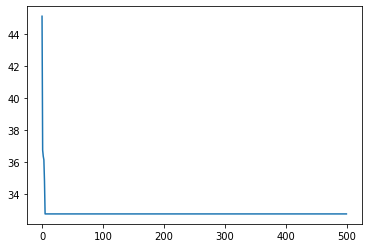

In [186]:
import matplotlib.pyplot as plt

plt.plot(result)
plt.show()